<a href="https://colab.research.google.com/github/T0gan/KTHack2020-Neural-Qubits/blob/main/CNN_klasik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt 


from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Number of original training examples: 60000
Number of original test examples: 10000
Number of filtered training examples: 12665
Number of filtered test examples: 2115


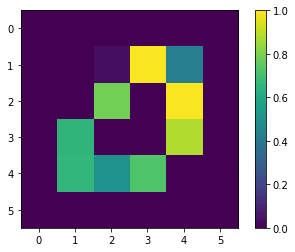

In [4]:
#import data
import collections

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

#Take only images of 3 and 6
def filter_36(x, y):
    keep = (y == 1) | (y == 0)
    x, y = x[keep], y[keep]
    y = y == 1
    return x,y

x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

x_train_small = tf.image.resize(x_train, (6,6)).numpy()
x_test_small = tf.image.resize(x_test, (6,6)).numpy()

def convert_label(y):
  if y==True:
    return 1.0
  else: 
    return -1.0

y_train=[convert_label(y) for y in y_train]
y_test=[convert_label(y) for y in y_test]

plt.imshow(x_train_small[0,:,:,0], vmin=0, vmax=1)
plt.colorbar()


X_train=x_train_small[:100]
X_test=x_test_small[:20]
Y_train=y_train[:100]
Y_test=y_test[:20]


x_train_4=X_train[:,1:5,1:5]
x_test_4=X_test[:,1:5,1:5]

In [33]:
cnn=tf.keras.Sequential()
cnn.add(layers.Conv2D(1,(2,2), input_shape=(4,4,1), strides=(2,2)))
cnn.add(layers.Conv2D(1,(2,2)))
cnn.add(layers.Flatten())



In [34]:
cnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 2, 2, 1)           5         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 1, 1)           5         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


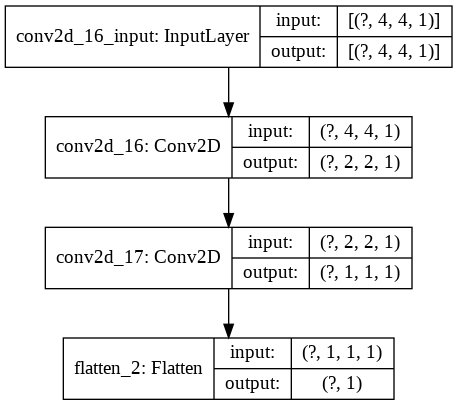

In [41]:
tf.keras.utils.plot_model(cnn, show_shapes=True)

In [35]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)




In [36]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.losses.Hinge(), metrics=[hinge_accuracy])


In [37]:
history=cnn.fit(x=x_train_4, y=np.asarray(Y_train), batch_size=16, epochs=25, verbose=1, validation_data=(x_test_4, np.asarray(Y_test)))

Epoch 1/25
7/7 [==============================] - 0s 21ms/step - loss: 1.0110 - hinge_accuracy: 0.5000 - val_loss: 1.0738 - val_hinge_accuracy: 0.5938
Epoch 2/25
7/7 [==============================] - 0s 4ms/step - loss: 1.0020 - hinge_accuracy: 0.5625 - val_loss: 1.0669 - val_hinge_accuracy: 0.5938
Epoch 3/25
7/7 [==============================] - 0s 4ms/step - loss: 0.9934 - hinge_accuracy: 0.5714 - val_loss: 1.0601 - val_hinge_accuracy: 0.6250
Epoch 4/25
7/7 [==============================] - 0s 5ms/step - loss: 0.9848 - hinge_accuracy: 0.5268 - val_loss: 1.0533 - val_hinge_accuracy: 0.6250
Epoch 5/25
7/7 [==============================] - 0s 4ms/step - loss: 0.9759 - hinge_accuracy: 0.5357 - val_loss: 1.0464 - val_hinge_accuracy: 0.6250
Epoch 6/25
7/7 [==============================] - 0s 4ms/step - loss: 0.9667 - hinge_accuracy: 0.5893 - val_loss: 1.0394 - val_hinge_accuracy: 0.6562
Epoch 7/25
7/7 [==============================] - 0s 4ms/step - loss: 0.9576 - hinge_accuracy: 0.58

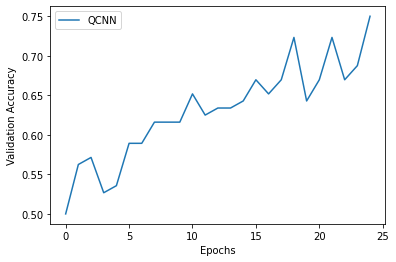

In [38]:
plt.plot(history.history['hinge_accuracy'], label='QCNN')
#plt.plot(hybrid_history.history['val_custom_accuracy'], label='Hybrid CNN')
#plt.title('Quantum vs Hybrid CNN performance')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Validation Accuracy')
plt.show()